In [1]:
import pandas as pd #pandas library
import numpy as np #numpy library
import matplotlib.pyplot as plt #plotting
import seaborn as sns #seaborn library for plotting
from sklearn.linear_model import LinearRegression  #for linear regression
from sklearn.cross_validation import train_test_split   #for splitting dataset
from sklearn import metrics     #to use built-in metrics library

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)  #change figure size

In [2]:
url = "https://raw.githubusercontent.com/kennchin/kaggle_bike/master/train.csv"
bikes = pd.read_csv(url,index_col="datetime",parse_dates=True)

In [3]:
bikes.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [4]:
# Need to rename count column to avoid confusion with python built-in fxn (count)
bikes.rename(columns={'count':'total'},inplace=True)

In [5]:
bikes.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


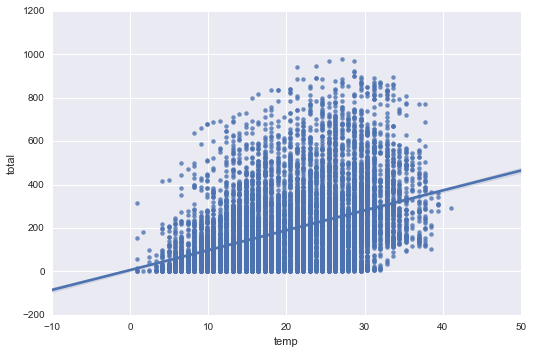

In [6]:
#visualizing our data.
sns.lmplot(x='temp',y='total',data=bikes,aspect=1.5)

In [7]:
#Prediction using simple linear regression model
features_col =['temp']
X = bikes[features_col]
y = bikes['total']

In [8]:
#initialize object
linear = LinearRegression()

In [9]:
linear.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print (linear.intercept_)
print (linear.coef_)

6.04621295962
[ 9.17054048]


The linear regression model is total=6.046 + 9.171*temp
 - the intercept tell us that when temp=0, the average total rental is 9.171
 - the coefficient tell us that for a unit change in temp there is an average change of 9.171 total rental

In [11]:
#make prediction using our model
linear.predict(30)

array([ 281.1624274])

In [12]:
#Let's look at what features are correlated to total rental to include in our model
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


Note:
    - Season and Weather are categorical variable
    - temp and atemp are highly correlated to one another so we can just use either one
    - casual and registered are highly correlated to one another and also correlated with the total; thus we don't have to include it in our model.
    - holiday and workingday are not correlated with total; thus we don't have to include it in our model

In [13]:
#explore categorical variable
print (bikes.weather.unique())   #look for the levels of the weather variable
print (bikes.season.unique())    #look for the levels of the season variable

[1 2 3 4]
[1 2 3 4]


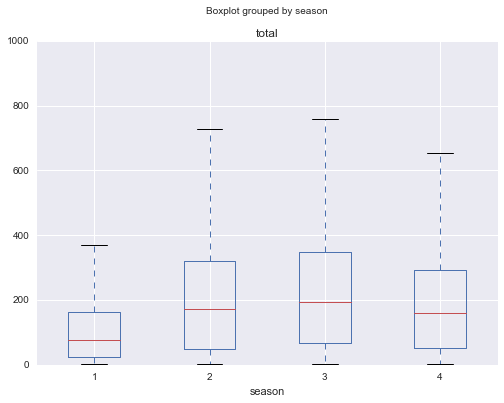

In [14]:
bikes.boxplot(column='total', by='season')

Note:

 1 = spring, 2 = summer, 3 = fall, 4 = winter 
 
    - There seem to be more rentals during summer and fall.
    - The smallest amount of rental occurs during spring.

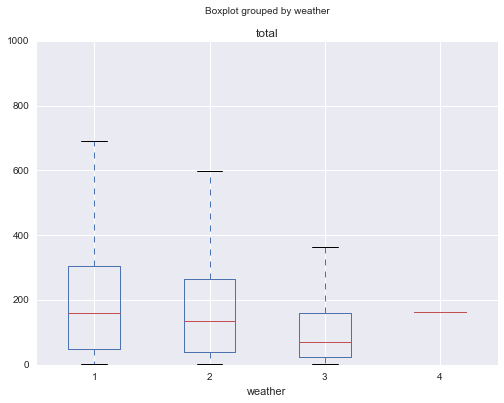

In [15]:
bikes.boxplot(column='total', by='weather')

Note:
    - There is a red line in weather 4 but no box. Is that an error?
    - There is difference in the total number of rentals due to weather: highest is weather=1, lowest is weather=3.

In [16]:
# Print out the data with weather=4
print (bikes[bikes.weather == 4])

                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2012-01-09 18:00:00       1        0           1        4   8.2  11.365   

                     humidity  windspeed  casual  registered  total  
datetime                                                             
2012-01-09 18:00:00        86     6.0032       6         158    164  


In [17]:
# We notice that there is only one datum with weather=4, so the boxplot is correct.
# let's include weather and season to our model
features_col_more = ['temp','weather','season','humidity','windspeed']
X = bikes[features_col_more]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print (linreg.coef_)
print (linreg.intercept_)

[  7.87302778   5.52977336  22.84613691  -3.03062102   0.56356391]
147.527110401


In [19]:
#pair feature with coefficient
list(zip(features_col_more,linreg.coef_))

[('temp', 7.8730277763958503),
 ('weather', 5.5297733639859459),
 ('season', 22.846136906165686),
 ('humidity', -3.0306210184812294),
 ('windspeed', 0.5635639110623436)]

How do we know which features are important?
    - linear regression, we can look at the p-value
    - in general, we can calculate the square root mean square error 
    (this is just the deviation from our model to the actual value)

In [20]:
#define a function to calculate the square root mean square error
def train_test_rmse(features):
    X = bikes[features]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [21]:
#test our function works
print (train_test_rmse(['temp','weather','season','humidity','windspeed']))
print (train_test_rmse(['temp']))
print (train_test_rmse(['temp','weather','season','humidity']))
print (train_test_rmse(['temp','season','weather']))
print (train_test_rmse(['temp','season','humidity']))

155.543871822
166.175955908
155.649459131
164.165399763
155.598189367


Note:
    - From all of the models above, it appears that the linear model with predictors temp,weather,season,humidity,windspeed give the lowest rmse. BUT some predictors are categorical does it matter?

In [22]:
#explore if dummy coding makes a difference in our model
season_dummies = pd.get_dummies(bikes.season, prefix="season")

In [23]:
season_dummies.sample(n=5,random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0.0,0.0,1.0,0.0
2012-03-18 04:00:00,1.0,0.0,0.0,0.0
2012-10-14 17:00:00,0.0,0.0,0.0,1.0
2011-04-04 15:00:00,0.0,1.0,0.0,0.0
2012-12-11 02:00:00,0.0,0.0,0.0,1.0


In [24]:
season_dummies.drop(season_dummies.columns[0],axis=1,inplace=True)
season_dummies.sample(n=5,random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0.0,1.0,0.0
2012-03-18 04:00:00,0.0,0.0,0.0
2012-10-14 17:00:00,0.0,0.0,1.0
2011-04-04 15:00:00,1.0,0.0,0.0
2012-12-11 02:00:00,0.0,0.0,1.0


In [26]:
#let's combine season_dummies column with our original dataset, axis=0 means row and axis=1 mean column
bikes = pd.concat([bikes,season_dummies],axis=1)

In [27]:
bikes.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0.0,0.0,0.0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0.0,0.0,0.0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0.0,0.0,0.0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0.0,0.0,0.0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.0,0.0,0.0


In [28]:
bikes.tail(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,0.0,0.0,1.0
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,0.0,0.0,1.0
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,0.0,0.0,1.0
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,0.0,0.0,1.0
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,0.0,0.0,1.0


In [35]:
#let's compare a linear model with dummy coding and a linear model without dummy coding
features_dummy = ['temp','season_2','season_3','season_4','humidity']
X = bikes[features_dummy]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
list(zip(features_dummy,linreg.coef_))

[('temp', 11.186405863575752),
 ('season_2', -3.3905430997189026),
 ('season_3', -41.736860713171623),
 ('season_4', 64.415961468241861),
 ('humidity', -2.8194816362596438)]

Interpretation:
    - Holding all predictors constant, there is a decrease of 3.39 rental compared to spring
   
Note:
    season 1 (spring is the baseline)